# Viviendas en Boston

## Regresión lineal

- Se debe hallar la función de pérdido o de costo.
- Para ello calculamos la distancia residual entre la linea y el punto, para luego minimizar la suma de los cuadrados de los residuos. (Mínimos cuadrados Ordinarios o OLS)

In [3]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
plt.style.use('ggplot')

In [5]:
boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


- CRIM -> tasa de criminalidad per cápita
- NX -> Concentración de óxido nítrico
- NM -> Número medio de habitaciones por vivienda
- MEDV -> Valor medio de las viviendas ocupadas por sus propietarios en miles de dolares (VALOR OBJETIVO)
- RM -> Cantidad promedio de habitaciones en un bloque

In [73]:
# Creando matrices de características y destino
X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values

## Intentemos predecir el precio a partir de una sola función: la cantidad promedio de habitaciones en un bloque

In [74]:
X_rooms = X[:,5]

In [75]:
# Verificamos que las dos variables son matrices
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [76]:
# Redimiencionando
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

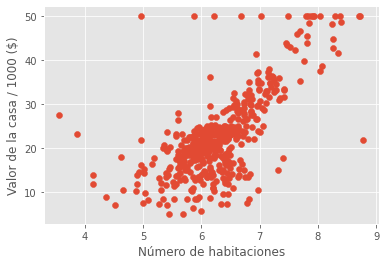

In [77]:
# trazaremos el valor de la casa en función del número de habitaciones usando la dispersión de puntos plt de matplotlib
plt.scatter(X_rooms,y)
plt.ylabel('Valor de la casa / 1000 ($)')
plt.xlabel('Número de habitaciones')
plt.show()

### Ajustando un modelo de regresión a nuestros datos y trazando predicciones

In [78]:
reg = LinearRegression()

In [79]:
# Ajustando la regresión a lo datos
reg.fit(X_rooms,y)

LinearRegression()

In [80]:
# Verificando las predicciones de los regresores sobre el rango de los datos
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)

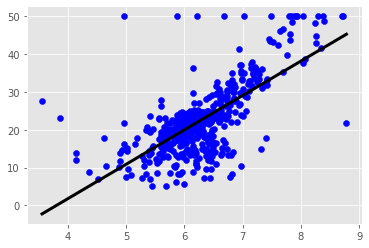

In [81]:
#plot
plt.scatter(X_rooms,y,color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color='black',linewidth=3)
plt.show()

 ## Regresión lineal para los datos de vivienda en Boston

In [85]:
# dividimos el conjunto de datos en datos de prueba y de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [92]:
# Instanciamos el regresor
reg_all = LinearRegression()

In [93]:
# entrenamos el conjunto de datos
reg_all.fit(X_train, y_train)

LinearRegression()

In [91]:
# Predecimos el conjunto de prueba
y_pred = reg_all.predict(X_test)

In [94]:
# Calculamos el R cuadrado
reg_all.score(X_test, y_test)

0.7112260057484879